In [2]:
from keras.models import load_model
from ultralytics import YOLO
import cv2
import numpy as np

# Load animal classifier
classifier = load_model("C:/Users/admin/Downloads/animal_classifier_1.h5")

# Load wound detector (YOLO)
wound_model = YOLO("C:/Users/admin/Downloads/best.pt")


In [3]:
def classify_species(img_path):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (224, 224))   # match your classifier input size
    img_array = np.expand_dims(img_resized / 255.0, axis=0)

    pred = classifier.predict(img_array)
    class_id = np.argmax(pred)
    return class_id, pred


In [4]:
def detect_wounds(img_path):
    results = wound_model.predict(source=img_path)
    return results


In [5]:
def analyze_animal(img_path):
    # Step 1: Species classification
    species_id, species_probs = classify_species(img_path)

    # Step 2: Wound detection
    wounds = detect_wounds(img_path)

    return species_id, wounds


In [6]:
img = "C:/Users/admin/Downloads/goat_wounded.jpg"

species_id, wounds = analyze_animal(img)

print("Predicted species ID:", species_id)
print("Wound detection results:", wounds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step

image 1/1 C:\Users\admin\Downloads\goat_wounded.jpg: 384x640 1 wound, 218.3ms
Speed: 3.6ms preprocess, 218.3ms inference, 73.2ms postprocess per image at shape (1, 3, 384, 640)
Predicted species ID: 63
Wound detection results: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'wound'}
obb: None
orig_img: array([[[ 17,  32,  11],
        [ 13,  28,   7],
        [ 13,  28,   7],
        ...,
        [ 96,  95,  69],
        [ 96,  95,  69],
        [ 96,  95,  69]],

       [[ 16,  31,  10],
        [ 21,  36,  15],
        [ 27,  42,  21],
        ...,
        [166, 167, 141],
        [166, 167, 141],
        [166, 167, 141]],

       [[ 30,  45,  24],
        [ 54,  69,  48],
        [ 79,  94,  73],
        ...,
        [120, 123,  97],
        [120, 123,  97],
        [120, 123,  97]],

       ...,

       [[ 85, 119,  88],
        [ 61,  95,  64],

In [7]:
from IPython.display import Image, display

# Show saved prediction image
display(Image(filename="runs/detect/predict/goat_wounded.jpg"))


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/predict/goat_wounded.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step

image 1/1 C:\Users\admin\Downloads\goat_wounded.jpg: 384x640 1 wound, 43.2ms
Speed: 1.2ms preprocess, 43.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


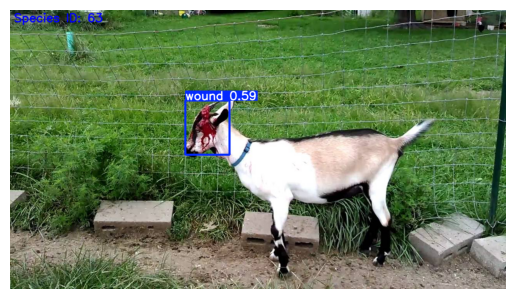

True

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# ---------------------------
# Load models
# ---------------------------
species_model = load_model("C:/Users/admin/Downloads/animal_classifier_1.h5")
wound_model = YOLO("C:/Users/admin/Downloads/best.pt")   # your YOLO .pt file

# ---------------------------
# Load image
# ---------------------------
img_path = "C:/Users/admin/Downloads/goat_wounded.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---------------------------
# Species classification
# ---------------------------
img_resized = cv2.resize(img_rgb, (224, 224)) / 255.0   # adjust size if your h5 model expects different
img_array = np.expand_dims(img_resized, axis=0)
species_pred = np.argmax(species_model.predict(img_array))
species_label = f"Species ID: {species_pred}"

# ---------------------------
# Wound detection (YOLO)
# ---------------------------
results = wound_model.predict(source=img_path, save=False)
annotated_img = results[0].plot()   # YOLO auto-draws bounding boxes

# ---------------------------
# Overlay species label on YOLO result
# ---------------------------
cv2.putText(
    annotated_img,
    species_label,
    (10, 30),                     # top-left corner
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (255, 0, 0),                   # blue text
    2,
    cv2.LINE_AA
)

# ---------------------------
# Show combined result
# ---------------------------
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# ---------------------------
# Optional: Save the result
# ---------------------------
cv2.imwrite("combined_prediction.jpg", annotated_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

image 1/1 C:\Users\admin\Downloads\tiger.jpg: 512x640 (no detections), 272.3ms
Speed: 3.9ms preprocess, 272.3ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


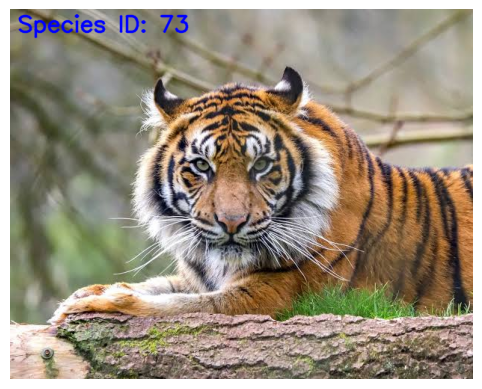

True

In [9]:
img_path = "C:/Users/admin/Downloads/tiger.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---------------------------
# Species classification
# ---------------------------
img_resized = cv2.resize(img_rgb, (224, 224)) / 255.0   # adjust size if your h5 model expects different
img_array = np.expand_dims(img_resized, axis=0)
species_pred = np.argmax(species_model.predict(img_array))
species_label = f"Species ID: {species_pred}"

# ---------------------------
# Wound detection (YOLO)
# ---------------------------
results = wound_model.predict(source=img_path, save=False)
annotated_img = results[0].plot()   # YOLO auto-draws bounding boxes

# ---------------------------
# Overlay species label on YOLO result
# ---------------------------
cv2.putText(
    annotated_img,
    species_label,
    (10, 30),                     # top-left corner
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (255, 0, 0),                   # blue text
    2,
    cv2.LINE_AA
)

# ---------------------------
# Show combined result
# ---------------------------
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# ---------------------------
# Optional: Save the result
# ---------------------------
cv2.imwrite("combined_prediction.jpg", annotated_img)

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# ---------------------------
# Load models
# ---------------------------
animal_model = load_model("C:/Users/admin/Downloads/animal_classifier_1.h5")
wound_model = YOLO("C:/Users/admin/Downloads/best.pt")

# ---------------------------
# Input and output folders
# ---------------------------
folder_path = "C:/Users/admin/Downloads/dataset/val/injured"   # folder containing images
output_folder = "C:/Users/admin/Downloads/combined_results"
os.makedirs(output_folder, exist_ok=True)

with open("C:/Users/admin/Downloads/animal_species.txt", "r") as f:
    species_names = [line.strip() for line in f.readlines()]
    

# ---- Prediction function ----
def predict_species_and_wound(img_path):
    # Preprocess for animal species model
    img = image.load_img(img_path, target_size=(128, 128))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  

    # Predict species
    preds = animal_model.predict(img_array)
    pred_class = np.argmax(preds, axis=1)[0]
    species_name = species_names[pred_class] if pred_class < len(species_names) else f"Unknown (ID {pred_class})"

    # Predict wounds
    wound_results = wound_model.predict(source=img_path, save=True, save_txt=True)

    return species_name, wound_results

# ---------------------------
# Process each image
# ---------------------------
def process_folder(folder_path):
    results_summary = []
    for file in os.listdir(folder_path):
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            img_path = os.path.join(folder_path, file)
            try:
                species, wound_results = predict_species_and_wound(img_path)
                results_summary.append((file, species, wound_results))
                print(f"[DONE] {file} -> Species: {species}, Wounds detected: {len(wound_results[0].boxes)}")
            except Exception as e:
                print(f"[ERROR] {file}: {e}")
    return results_summary

# ---- Example usage ----

summary = process_folder(folder_path)

# Print final summary
for file, species, wounds in summary:
    print(f"{file}: {species}, wounds detected: {len(wounds[0].boxes)}")


[ERROR] 1000_F_415313528_1NsIyi5SCY9820hQEnndSOnDq6OFp1Nh.jpg: Exception encountered when calling Sequential.call().

Input 0 of layer "vgg19" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 128, 128, 3)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None
[ERROR] 26565bcf3ca584ddc44a90225c64fdfd.jpg: Exception encountered when calling Sequential.call().

Input 0 of layer "vgg19" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 128, 128, 3)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 128, 128, 3), dtype=float32)
  • training=False
  • mask=None
[ERROR] 420-with-a-broken-jaw-in-2007.jpg: Exception encountered when calling Sequential.call().

Input 0 of layer "vgg19" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 128, 128, 3)

Arguments received by Sequential.call():
  • i